<h1>Regresion Lineal</h1>

Entrenamiento Supervisado

y=w*x+b

W= angulo de la pendiente
x=paramtero
b=bias (posicion de la pendiente)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as lines
plt.style.use('seaborn-dark')

C:\Users\Will\AppData\Local\Temp\ipykernel_10104\2108511147.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [2]:
def calcula_ganancia(x):
    y=0.8*x+5
    return y


calcula_ganancia(0)

5.0

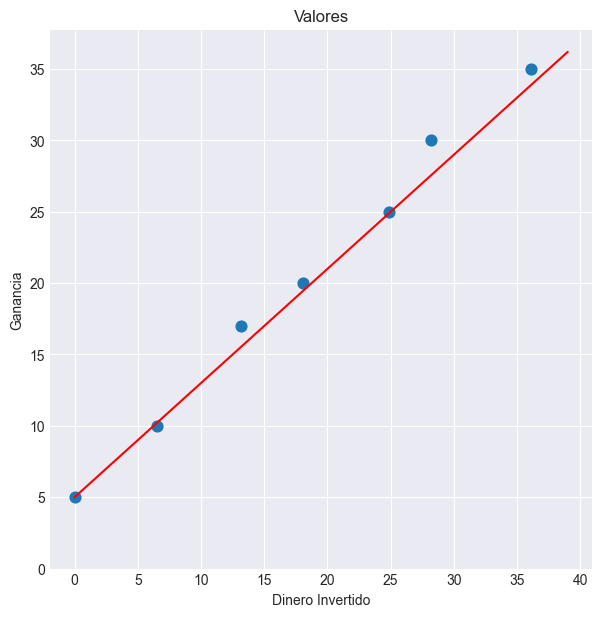

In [3]:
import numpy as np
x=np.array([0,6.5,13.2,18.1,24.9,28.2,36.1])
y=np.array([5,10,17,20,25,30,35])

x2=np.arange(0,40)
y2=0.8*x2+5

plt.figure(figsize=(7,7))
plt.plot(x2,y2,color="red",label="Solucion")
plt.scatter(x,y,s=60)
plt.ylim(bottom=0)
plt.title("Valores")
plt.xlabel("Dinero Invertido")
plt.ylabel("Ganancia")
plt.grid()
plt.show()

In [4]:
calcula_ganancia(25)

25.0

<h2>Regresion Lineal Polinomial</h2>

y=w1*x1+w2*x2+...+wn*xn+b

Tridimesional por tanto la respuesta ya no es una recta , sino un plano.

Error cuadratico promedio (MSE):


MSE=1/N*Sumatoria(real-estimado)^2

Raíz cuadrada del MSE

RMSE = sqrt(1/M*Sumatoria(Real-Estimado)^2)

MSE=Error cuadrático medio

M=número total de puntos o predicciones

Sumatoria:Letra griega Sigma

El error cuadrático, es preciso, pero algo engañoso, ya que si vemos en una estimación de precios que nuestro sistema tiene un error cuadrático medio de 1 millón de dólares, tenemos que tener presente de que sumamos potencias de 2, en otras palabras sumamos números que previamente los elevamos al cuadrado.

Por lo que el error real, será la raíz cuadrada de ese valor, al cual, por sus siglas en inglés lo denominamos RMSE.

Para resumir, a la hora de visualizar puede que el RMSE nos de una sensación más realista, pero a la hora de computar, el MSE tiene una carga computacional menor, por eso es más usado.

<h2>Regresión usando Scikit-Learn</h2>

In [5]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
salary=pd.read_csv('/Programacion/Machine Learning/csv/vgsales.csv')
salary.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
salary.shape

(16598, 11)

In [8]:
salary.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:

features=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

In [10]:
target=['Global_Sales']

In [11]:
#limpiamos los datos
salary=salary.dropna()

In [12]:
#Separamos las Features en x y el target en y
x=salary[features]
y=salary[target]

In [13]:
#Miramos como luce una fila tipica
x.iloc[3]

NA_Sales       15.75
EU_Sales       11.01
JP_Sales        3.28
Other_Sales     2.96
Name: 3, dtype: float64

In [14]:
x.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00


In [15]:
y.head()

,Global_Sales
0,82.74
1,40.24
2,35.82
3,33.00
4,31.37


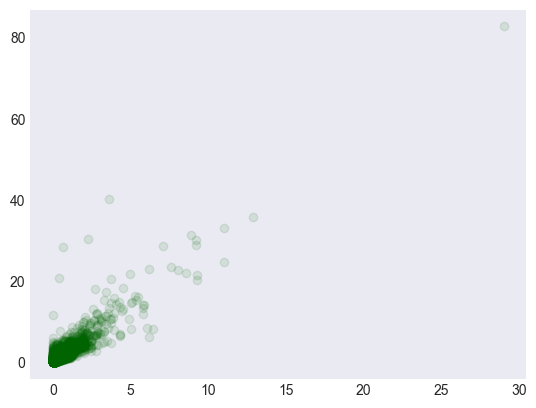

In [16]:
plt.scatter(x['EU_Sales'],y,color='darkgreen',label="Data",alpha=.1)

<h2>Separamos los datos en Training y Test Datasets</h2>

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=324)

In [18]:
#Escalar los datos
scale=preprocessing.StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_train

array([[-0.26200514, -0.27463714, -0.25034028, -0.23556084],
       [-0.19017284, -0.27463714, -0.25034028, -0.1883769 ],
       [-0.02256414,  0.07191775, -0.25034028,  0.04754276],
       ...,
       [ 0.24082095, -0.12871929, -0.25034028,  6.0399023 ],
       [-0.28594924, -0.23815768, -0.25034028, -0.23556084],
       [-0.22608899, -0.27463714, -0.25034028, -0.1883769 ]])

Creamos una instancia del modelo LinearRegression de Scikit-Learn

In [19]:
regressor=LinearRegression()

Ajustamos el modelo a los datos de entrenamiento

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
X_test=scale.transform(X_test)
y_prediction=regressor.predict(X_test)
y_result=y_prediction-y_test
y_prediction.shape

(5377, 1)

In [22]:
RMSE=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
regressor.score(X_test,y_test)

0.9999855104785901

In [23]:
print(RMSE)

0.0052024502504110235


In [24]:
regressor.coef_

array([[0.83520569, 0.54823194, 0.31818018, 0.21190421]])